# Prediccion de Precios de Carros

Creacion de un modelo de Machine Learning para predecir los precios de los carros en el mercado estadounidense. El objetivo es ayudar a nuevos integrantes a comprender factores de precios importantes en este mercado.

# Seccion 1. Analisis y exploracion de los datos

## Librerias

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gestion de advertencias

In [19]:
import warnings

# ignora advertencias sobre funcionalidades que se van a dejar de usar
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignora advertencias sobre problemas en tiempo de ejecucion
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Cargar datos

In [20]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
# resumen por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Las 26 variables estan libres de valores faltantes. Existen 205 registros

## Entendiendo las variables predictoras

### **Symboling**

Hace referencia al riesgo del auto y va en una escala de -2 a 3,siendo el -2 menos riesgoso y 3 mas riesgoso.

In [22]:
# Categorias de la variable Symboling
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [23]:
# porcentaje de las diferentes categorias de symboling
df['symboling'].value_counts(normalize=True)*100

 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64

- La mayoria de los carros son 0, 1, 2, es decir con un riesgo considerable

- Son pocos los carros con bajo riesgo (-2)

### **Aspiration**

Es una propiedad del motor (de combustion interna) que muestra si la ingesta de oxigeno es estandar (presion atmosferica) o mediante turbocompresor (entrada de oxigeno a presion)

In [24]:
# categorias de la variable aspiration
df['aspiration'].value_counts(normalize=True)*100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

- El 81.9% de los carros son de ingesta de oxigeno estandar
- El 18.1% son de turbocompresor

### **Drivewheel**

Hace referencia a la rueda de traccion del carro: rueda delantera (frontwheel), rueda trasera (rear wheel) o traccion en las cuatro ruedas (four-wheel drive).

In [25]:
df['drivewheel'].value_counts(normalize=True)*100

fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

- El 58.3% de los carros son de traccion delantera
- El 37.1% son de traccion trasera
- El 4.4% son de traccion en las 4 ruedas.

### **Wheelbase**

Es la distancia entre el centro de las ruedas delanteras y traseras.

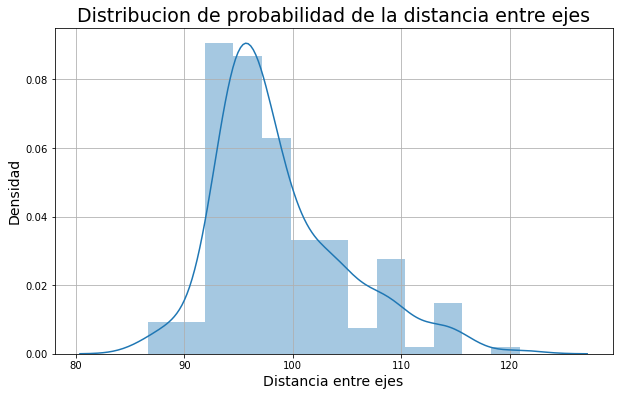

In [27]:
# como es una variable numerica, veamos su distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['wheelbase'])
plt.grid(True)
plt.xlabel('Distancia entre ejes', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Distribucion de probabilidad de la distancia entre ejes', fontsize= 19);

- La mayoria de los carros tienen una distancia entre ejes entre 92.5 y 97.5 

### **Curbweight**

Peso del carro sin ocupantes ni equipajes

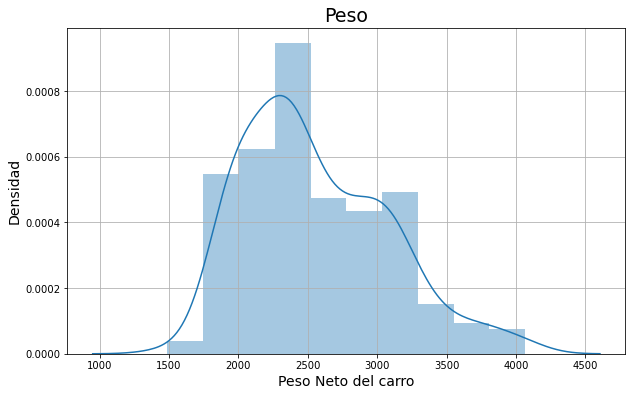

In [28]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['curbweight'])
plt.grid(True)
plt.xlabel('Peso Neto del carro', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Peso', fontsize= 19);

- La mayoria de los carros pesan entre 2000 y 2500.

### **Stroke**

Es el volumen del motor (distancia recorrida por el piston en cada ciclo)

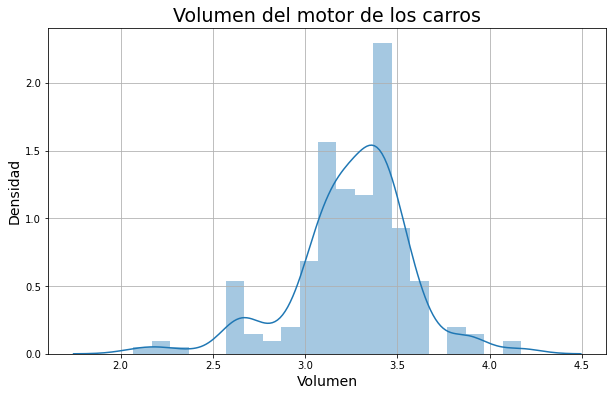

In [35]:
# distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['stroke'])
plt.grid(True)
plt.xlabel('Volumen', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Volumen del motor de los carros', fontsize= 19);

- Hay una gran cantidad de carros con volumen de motor de 3.4.

### **Compression ration**

Relacion de volumen de la camara de compresion de mayor a menor capacidad

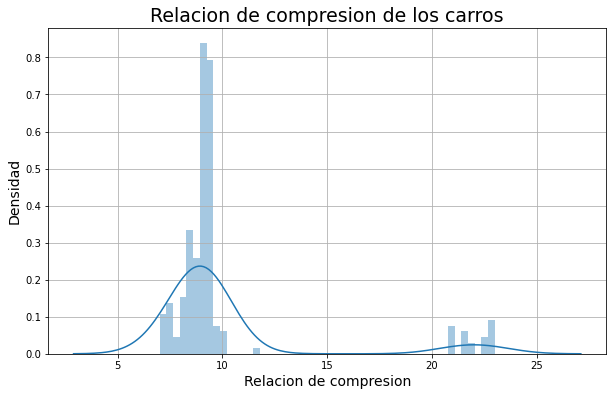

In [36]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['compressionratio'])
plt.grid(True)
plt.xlabel('Relacion de compresion', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Relacion de compresion de los carros', fontsize= 19);

- La mayoria de los carros tienen una relacion de compresion de 7.5 a 10.0
- Hay unos pocos con relacion de compresion entre 20 y 22.5
- En estos dos rangos se encuentran todos los carros.